In [4]:
import sqlalchemy as sa
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import string


%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20.0, 10.0)
matplotlib.rcParams["font.size"] = 26
matplotlib.rcParams["axes.grid"] = True
matplotlib.rcParams["axes.facecolor"] = (0.97,0.97,0.97)

In [5]:
%run ../toxref_mysql_connect.py
# print(connect.__doc__)
con = connect()  

In [6]:
query1 = """SELECT study_source,COUNT(study_id) AS ct 
    FROM study GROUP BY study_source ORDER BY study_source,ct; """

In [7]:
results1 = pd.read_sql(query1,con)

In [14]:
for i,row in results1.iterrows():
    if "pharma" in row.study_source:
        results1.at[i,"study_source"] = "pharma"
    if row.study_source in ["NTP Report","ntp","NTP Technical Report"]:
        results1.at[i,"study_source"] = "NTP"
    if row.study_source == "opp_der":
        results1.at[i,"study_source"] = "OPP DER"
    if row.study_source == "open_lit":
        results1.at[i,"study_source"] = "OpenLit"
    if row.study_source in ["rivm","pmra_der","unassigned","unknown","unpublished_submission"]:
        results1.at[i,"study_source"] = "Other"
    if "other" in row.study_source:
        results1.at[i,"study_source"] = "Other"
#     print(row)

In [15]:
query2 = """SELECT study_type,species,COUNT(study_id) AS ct 
    FROM study GROUP BY study_type,species ORDER BY study_type,ct; """

In [16]:
results2 = pd.read_sql(query2,con).sort_values("ct")

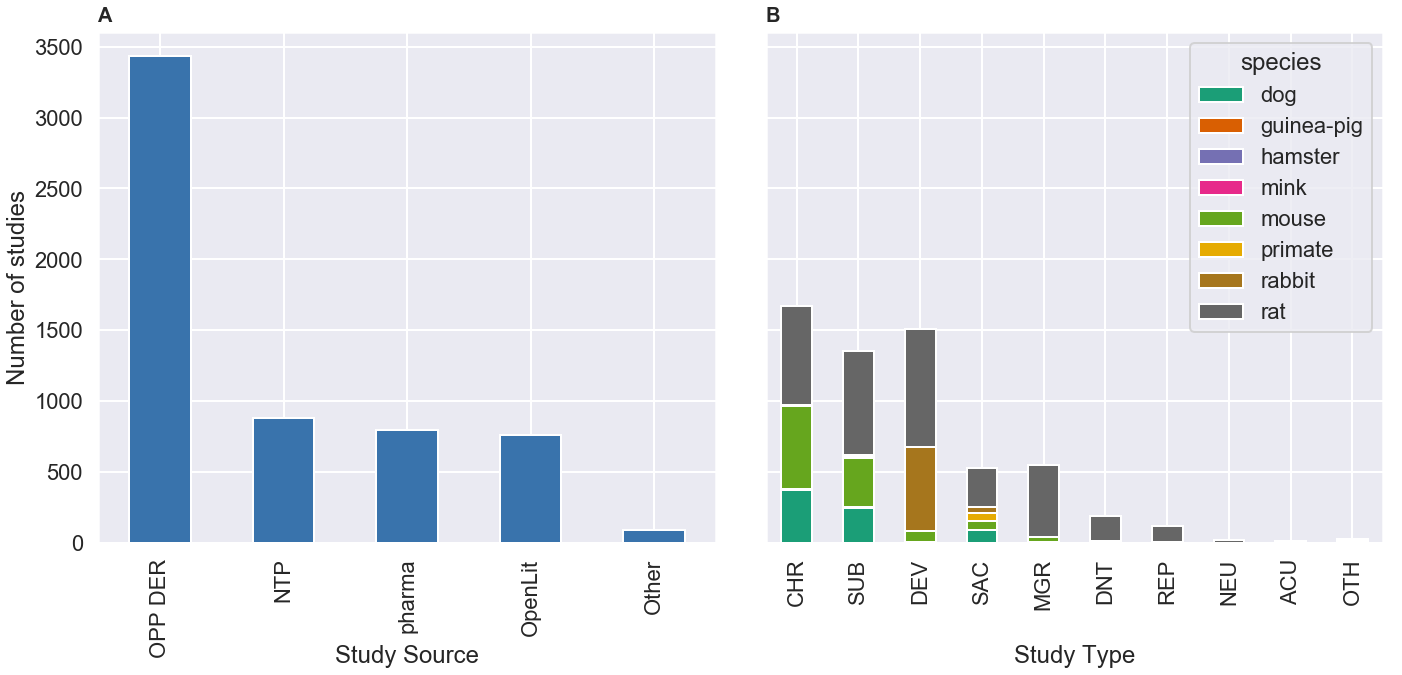

In [18]:
sns.set()
sns.set_context("poster")
sns.set_palette(sns.color_palette("Dark2",n_colors=8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122,sharey=ax1)
results1.groupby("study_source").ct.sum().sort_values(ascending=False).plot.bar(legend=False,ax=ax1,color="#3973ac")
results2.pivot(columns="study_type",index="species",values="ct").T.loc[[
    "CHR","SUB","DEV","SAC","MGR","DNT","REP","NEU","ACU","OTH"]].plot.bar(stacked=True,ax=ax2)

ax1.set_xlabel("Study Source")
ax1.set_ylabel("Number of studies")
ax2.set_xlabel("Study Type")
ax1.xaxis.set_label_coords(0.5,-0.2)
ax2.xaxis.set_label_coords(0.5,-0.2)

for n, ax in enumerate([ax1,ax2]):
    
    ax.text(0., 1.02, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')

plt.tight_layout()
plt.savefig("Figure1.jpg",dpi=500,bbox_inches="tight")